<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/backtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest VIX

In [ ]:
!pip install vectorbt pandas yfinance

: 

In [ ]:
import vectorbt as vbt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2024-11-29')

# Define entry and exit signals
entries = vix_data['Close'] <= 14
exits = vix_data['Close'] >= 20

# Create a portfolio
portfolio = vbt.Portfolio.from_signals(
    vix_data['Close'],
    entries,
    exits,
    init_cash=20000,
    fees=0.001
)

# Simplified Equity Plot
portfolio.total_return().vbt.plot(title="Portfolio Total Return").show()
#portfolio['equity'].vbt.plot(title="Portfolio Equity Curve").show()
#portfolio.drawdowns.plot(title="Portfolio Drawdowns").show()
print(portfolio.drawdowns.records)

# Calculate and plot drawdown depth
drawdown_depth = portfolio.drawdowns.records['peak_val'] - portfolio.drawdowns.records['valley_val']

# Plot drawdown depth over time
# plt.figure(figsize=(10, 6))
# plt.plot(drawdown_depth, label="Drawdown Depth")
# plt.title("Drawdown Depth Over Time")
# plt.xlabel("Drawdown Events")
# plt.ylabel("Depth")
# plt.legend()
# plt.show()

# portfolio.drawdowns.records['valley_val'].vbt.plot(title="Drawdown Valley Values").show()



# QYLP & VYXL

In [1]:
pip install vectorbt pandas numpy matplotlib yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed


No price data available for QYLD.L. Skipping.


[*********************100%***********************]  1 of 1 completed


No price data available for VIXL.L. Skipping.


[*********************100%***********************]  1 of 1 completed
/var/folders/_s/8nbl1xbx7gd1c120t1nz_r9h0000gn/T/ipykernel_51007/994590915.py:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


No price data available for ^GSPC. Skipping.


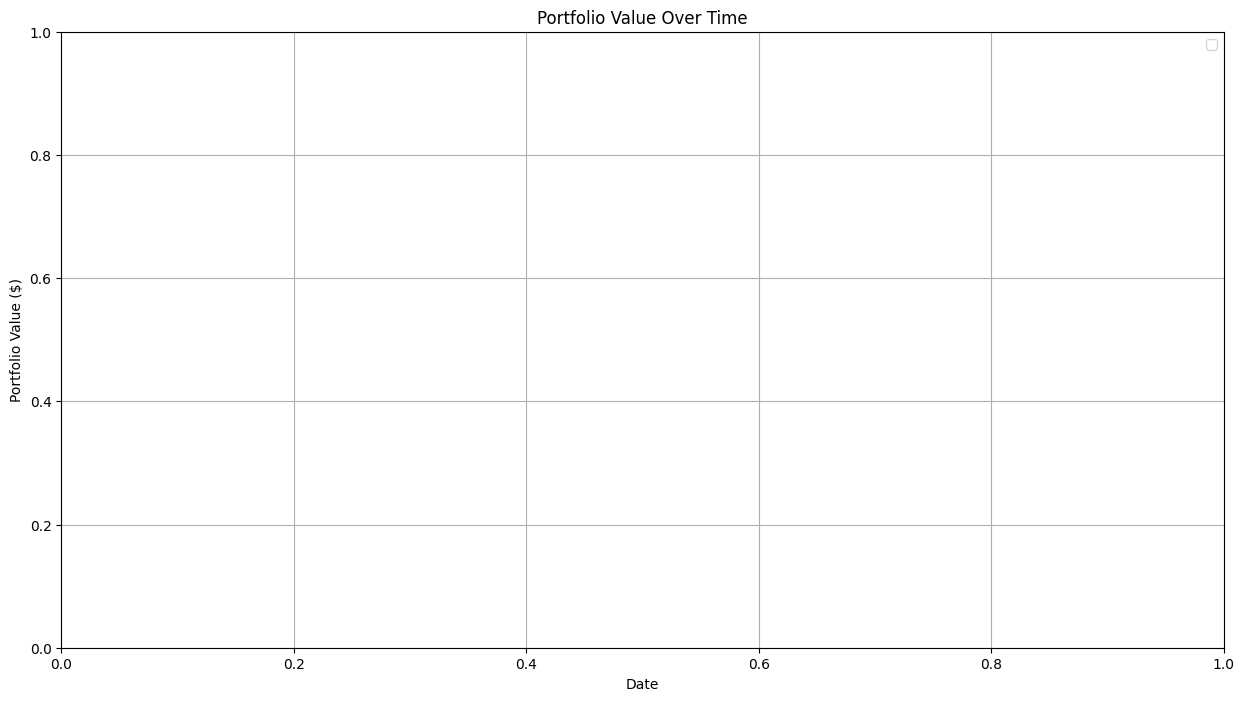

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vectorbt as vbt

def backtest_strategy(ticker, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Backtests a simple buy/sell strategy for a given ticker.

    Args:
        ticker (str): The stock ticker symbol.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.

    Returns:
        pd.DataFrame: A DataFrame containing the backtest results.
    """

    data = yf.download(ticker, period="2y", auto_adjust=True)

    if data.empty:
        print(f"No data downloaded for {ticker}. Skipping.")
        return pd.DataFrame()  # Return an empty DataFrame

    columns = data.columns.tolist()

    if 'Close' in columns:
        prices = data['Close']
    else:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    if prices.empty:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    dates = prices.index

    cash = initial_cash
    initial_price = float(prices.iloc[0])  # Convert to float
    assets = initial_asset / initial_price
    portfolio_value = [cash + assets * initial_price]
    cash_values = [cash]
    asset_values = [assets * initial_price]
    positions = [assets]

    in_position = True
    buy_price = initial_price

    for i in range(1, len(prices)):
        current_price = float(prices.iloc[i])  # Convert to float
        current_portfolio_value = cash + assets * current_price
        portfolio_value.append(current_portfolio_value)
        cash_values.append(cash)
        asset_values.append(assets * current_price)
        positions.append(assets)

        if in_position:
            if (current_price / buy_price - 1) >= profit_threshold:
                cash += assets * current_price
                assets = 0
                in_position = False
                buy_price = 0
        else:
            if current_price < buy_price * (1 - profit_threshold):
                assets = cash / current_price
                cash = 0
                in_position = True
                buy_price = current_price

    results = pd.DataFrame({
        'Date': dates,
        'Portfolio Value': portfolio_value,
        'Cash': cash_values,
        'Asset Value': asset_values,
        'Positions': positions,
        'Price': prices,
    })

    return results

def run_parallel_backtests(tickers, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Runs backtests in parallel for multiple tickers and plots the results.

    Args:
        tickers (list): A list of stock ticker symbols.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.
    """

    results = {}
    for ticker in tickers:
        result = backtest_strategy(ticker, initial_cash, initial_asset, profit_threshold)
        if not result.empty: # added check here.
          results[ticker] = result

    plt.figure(figsize=(15, 8))
    for ticker, result in results.items():
        plt.plot(result['Date'], result['Portfolio Value'], label=ticker)

    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    for ticker, result in results.items():
        print(f"Final portfolio value for {ticker}: ${result['Portfolio Value'].iloc[-1]:.2f}")
        print(f"Final cash for {ticker}: ${result['Cash'].iloc[-1]:.2f}")
        print(f"Final position size for {ticker}: {result['Positions'].iloc[-1]:.2f}")

# Run the backtests
tickers = ['QYLD.L', 'VIXL.L', '^GSPC']
run_parallel_backtests(tickers)